<a href="https://colab.research.google.com/github/liang-faan/python-ml/blob/main/USML_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Natural Language Programming

In [ ]:
# Install the following packages
!pip install ydata_profiling swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 31.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.6 MB/s eta 0:00:00
  Created whee

In [ ]:
# (Optional) PyCaret NLP module needs spacy and its english module
# ## Remember to restart runtime
!pip3 install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Download spacy's english pack
!python3 -m spacy download en_core_web_sm

2023-04-29 01:07:55.593600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 01:07:57.165683: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Natural Language Programming

In [ ]:
import os
import swifter
import nltk
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
# We will download some processed data from the NLTK language package
nltk.download(['punkt', 'stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the news file RedditNews.csv
# Setup data path
data_path = Path('/content/drive/MyDrive/pcml_data/6USML')
news = pd.read_csv(data_path /'RedditNews.csv')

In [ ]:
# Check the data
from pandas_profiling import ProfileReport

news.profile_report(minimal=True)

<ipython-input-7-0184c9771b47>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Text Cleaning
For traditional NLP approaches, we will need to do some data cleaning. Here, I demonstrate the following techniques:

Lowercase all texts.
Remove stop words.
Remove punctuations.
Remove words with a length of 1
Convert words into their root form (stemming).

In [ ]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

sw = stopwords.words('english')

ps = PorterStemmer()
wl = WordNetLemmatizer()

def clean_text(s):
    # Convert text to lowercase
    s = s.lower()

    # Remove stopwords
    # some nltk stopwords will not match words tokenized by nltk
    tokens = [t.strip() for t in s.split(' ') if t not in sw]

    # Tokenize the text again using nltk
    s = ' '.join(tokens)
    tokens = word_tokenize(s)

    # Remove punctuations
    to_remove = list(punctuation) + ["``", "''"]
    tokens = [token for token in tokens if token not in to_remove]

    # Remove tokens with length < 2
    tokens = [t for t in tokens if len(t) > 1]

    # Convert tokens into their stemmed form
    tokens = [wl.lemmatize(t) for t in tokens]

    return ' '.join(tokens)

In [ ]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Extract the text column
news_content = news['News']

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(news['News'].iloc[0])

['A',
 '117-year-old',
 'woman',
 'in',
 'Mexico',
 'City',
 'finally',
 'received',
 'her',
 'birth',
 'certificate',
 ',',
 'and',
 'died',
 'a',
 'few',
 'hours',
 'later',
 '.',
 'Trinidad',
 'Alvarez',
 'Lira',
 'had',
 'waited',
 'years',
 'for',
 'proof',
 'that',
 'she',
 'had',
 'been',
 'born',
 'in',
 '1898',
 '.']

In [ ]:
# Test the function on 1 string
clean_text(news_content.iloc[0])

'117-year-old woman mexico city finally received birth certificate died hour later trinidad alvarez lira waited year proof born 1898'

In [ ]:
# Process all the news
news_cleaned = news_content.swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/73608 [00:00<?, ?it/s]

In [ ]:
news_cleaned

0        117-year-old woman mexico city finally receive...
1             imf chief back athens permanent olympic host
2             president france say brexit won donald trump
3        british man must give police 24 hour notice se...
4        100+ nobel laureate urge greenpeace stop oppos...
                               ...                        
73603    b'man go berzerk akihabara stab everyone nearb...
73604    b'threat world aid pandemic among heterosexual...
73605    b'angst ankara turkey steer dangerous identity...
73606    uk identity card 'could used spy people new ch...
73607    b'marriage said reduced status commercial tran...
Name: News, Length: 73608, dtype: object

### Text processing techniques

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import LatentDirichletAllocation

# Call an instance of tfidf
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(news_cleaned)

# Normalize the sparse matrix
csr_mat_norm = normalize(csr_mat)

# Create a LDA instance and fit the model
# random_state preserve the initial values before optimization
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(csr_mat_norm)

# Use the trained model to transform the data
lda_features = lda.transform(csr_mat_norm)

# we can combine the last 2 steps into 1 method

# lda_features = lda.fit_transform(csr_mat_norm)

In [ ]:
pd.DataFrame(lda_features)

,0,1,2,3,4,5,6,7,8,9
0,0.018818,0.018831,0.018833,0.018818,0.830568,0.018814,0.018827,0.018828,0.018828,0.018836
1,0.027646,0.027632,0.542722,0.027630,0.027628,0.027644,0.236194,0.027636,0.027633,0.027635
2,0.028252,0.028254,0.028255,0.745710,0.028252,0.028253,0.028257,0.028255,0.028254,0.028258
3,0.018550,0.018553,0.018554,0.018551,0.018549,0.018549,0.018553,0.833039,0.018550,0.018552
4,0.026515,0.026522,0.026509,0.434431,0.026511,0.026511,0.026530,0.026512,0.353445,0.026514
...,...,...,...,...,...,...,...,...,...,...
73603,0.776547,0.024882,0.024839,0.024823,0.024807,0.024841,0.024817,0.024827,0.024806,0.024810
73604,0.497676,0.025623,0.025624,0.025620,0.297350,0.025617,0.025623,0.025621,0.025625,0.025621
73605,0.027980,0.027982,0.027984,0.027980,0.027980,0.748133,0.027997,0.027986,0.027984,0.027993
73606,0.019207,0.083013,0.019210,0.019207,0.019208,0.019208,0.019212,0.019209,0.019208,0.763317


In [ ]:
# Check the shape of the results to ensure that we are getting components for each obs
lda_features.shape

(73608, 10)

In [ ]:
# Extract the top component for each observation
# Return max number column position
top_topics = np.argmax(lda_features, axis=1)

In [ ]:
top_topics

array([4, 2, 3, ..., 5, 9, 7])

In [ ]:
# Check the shape to ensure that we have a topic for each obs
top_topics.shape

(73608,)

In [ ]:
# Create a dataframe and set titles as the index
lda_df = pd.DataFrame(lda_features, index=news_content)

# Create a column for the top topic for each news
lda_df['topic'] = top_topics

lda_df

,0,1,2,3,4,5,6,7,8,9,topic
News,,,,,,,,,,,
"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.",0.018818,0.018831,0.018833,0.018818,0.830568,0.018814,0.018827,0.018828,0.018828,0.018836,4
IMF chief backs Athens as permanent Olympic host,0.027646,0.027632,0.542722,0.027630,0.027628,0.027644,0.236194,0.027636,0.027633,0.027635,2
"The president of France says if Brexit won, so can Donald Trump",0.028252,0.028254,0.028255,0.745710,0.028252,0.028253,0.028257,0.028255,0.028254,0.028258,3
British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.,0.018550,0.018553,0.018554,0.018551,0.018549,0.018549,0.018553,0.833039,0.018550,0.018552,7
100+ Nobel laureates urge Greenpeace to stop opposing GMOs,0.026515,0.026522,0.026509,0.434431,0.026511,0.026511,0.026530,0.026512,0.353445,0.026514,3
...,...,...,...,...,...,...,...,...,...,...,...
"b'Man goes berzerk in Akihabara and stabs everyone nearby: 6 dead, 12 injured '",0.776547,0.024882,0.024839,0.024823,0.024807,0.024841,0.024817,0.024827,0.024806,0.024810,0
"b'Threat of world AIDS pandemic among heterosexuals is over, report admits'",0.497676,0.025623,0.025624,0.025620,0.297350,0.025617,0.025623,0.025621,0.025625,0.025621,0
b'Angst in Ankara: Turkey Steers into a Dangerous Identity Crisis',0.027980,0.027982,0.027984,0.027980,0.027980,0.748133,0.027997,0.027986,0.027984,0.027993,5


In [ ]:
# News belonging to dominant topic n
dominant_topic = 0

lda_df[lda_df.topic==dominant_topic][['topic']]

,topic
News,
Emaciated lions in Taiz Zoo are trapped in blood-soaked cages and left to starve for months due to the Yemeni civil war,0
"2,500 Scientists To Australia: If You Want To Save The Great Barrier Reef, Stop Supporting Coal",0
Giant panda in Macau gives birth to twins,0
Richard Branson is calling on the UK government to hold a second EU referendum to prevent 'irreversible damage' to the country.,0
Dozens of bomb sniffing dogs 'killed by American security company in Kuwait after its contract with oil firm ended',0
...,...
"b""Tibet and the Olympic `tradition'""",0
b'Bilderberg attendee Geithner calls for global bank framework',0
"b""'Military coup' in Zimbabwe as Mugabe is forced to cede power to generals """,0


### Non-negative Matrix Factorization

I now demonstrate the NMF technique on a wikipedia dataset.
> Our objective is to use NMF to transform a word-frequency data. We want to associate wikipedia titles to combinations of the texts.
>
> Note that previous use-cases deal with un-tagged clusters (which we have to figure out what the themes are). Wikipedia is like a dictionary, which makes it easier for us to decipher the themes of the collection of clusters under NMF.

Before we load the dataset, check your data folder and compare the 2 file sizes: wiki.csv vs wiki.parquet.

Notice that the parquet file is smaller than csv. In fact, that is not the only advantage: parquet file formats retains more information about the datatypes, save and load much faster than csv, and consumes less memory.

> To read more, click [here](https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d).

Also, read about reducing dataset sizes before saving from [here](https://https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e).
>**This is essential to Data Scientists/Analysts who are working with large amounts of data. The time, space, and memory saved is non-trivial, so don't neglect this!**

#### Prepare the dataset
First, we load the parquet file wiki.parquet.

Pandas have a suite of functions that can read from most major file formats.

In [ ]:
wiki = pd.read_parquet(data_path / 'wiki.parquet')

In [ ]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463819 entries, 0 to 463818
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   463819 non-null  object
 1   text    463819 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB


Processing all 463,819 documents will take very long.

For this demonstration, I will select 1% of the sample. You can try the full sample to build your own wiki topic engine!

In [ ]:
wiki_sample = wiki.iloc[::100]
wiki_sample.reset_index(drop=True, inplace=True)
wiki_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4639 entries, 0 to 4638
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4639 non-null   object
 1   text    4639 non-null   object
dtypes: object(2)
memory usage: 72.6+ KB


In [ ]:
# Split the dataset into titles and documents
titles = wiki_sample.title
documents = wiki_sample.text

In [ ]:
# Apply the function to documents
documents_cleaned = documents.swifter.apply(clean_text)

Pandas Apply:   0%|          | 0/4639 [00:00<?, ?it/s]

#### Perform additional pre-processing

This dataset deals with natural language. Thus, the correct pre-processing technique is the tf-idf.

Look at the data layout, the rows are topics and the columns will be words.
> This is similar to the stock dataset that we played with.
>
> We can perform an additional normalization after tfidf.

In [ ]:
documents_cleaned

0       research design standard organisation rdso iso...
1       montori hughes born august 25 1990 american fo...
2       matura similar term matur maturita maturità ma...
3       northern exposure american television series r...
4       appeal novelty also called argumentum ad novit...
                              ...                        
4634    mehmet cengiz öz jhengis oz born june 11 1960 ...
4635    deity philippine mythology god goddess diwatas...
4636    protestant christian came nepal primarily nepa...
4637    shri adhya katyani shakti peeth mandir popular...
4638    land currently known egypt long involved popul...
Name: text, Length: 4639, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF

# Call an instance of tfidf
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents_cleaned)

# Normalize the sparse matrix
csr_mat_norm = normalize(csr_mat)

# Create a NMF instance and fit the model
nmf = NMF(n_components=10, random_state=42)
nmf.fit(csr_mat_norm)

# Use the trained model to transform the data
nmf_features = nmf.transform(csr_mat_norm)

In [ ]:
# Check the transformed features
nmf_features.shape

(4639, 10)

#### Explore the NMF features

In [ ]:
# Create a dataframe and set titles as the index
nmf_df = pd.DataFrame(nmf_features, index=titles)
nmf_df

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Research Design and Standards Organization,0.005074,0.000000,0.000000,0.000000,0.033257,0.017817,0.020924,0.037450,0.000000,0.003062
Montori Hughes,0.000000,0.000000,0.085291,0.004100,0.000000,0.078014,0.001865,0.000000,0.001056,0.001885
Matura,0.003371,0.000000,0.000000,0.000000,0.016658,0.060594,0.000000,0.005794,0.000000,0.000000
Northern Exposure,0.000000,0.000000,0.005340,0.151848,0.002288,0.000000,0.000000,0.019963,0.000000,0.000000
Appeal to novelty,0.011286,0.001280,0.000000,0.005457,0.021740,0.000000,0.000000,0.003231,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
Mehmet Oz,0.013987,0.000000,0.000000,0.072673,0.038368,0.052859,0.000000,0.000000,0.000000,0.000000
Deities of Philippine mythology,0.003775,0.002706,0.000000,0.014595,0.026731,0.000000,0.000000,0.044735,0.002780,0.001433
Christianity in Nepal,0.023763,0.001415,0.000081,0.000000,0.000000,0.000000,0.000000,0.038905,0.000000,0.000000


Each cluster is a theme. The weights associated with each cluster reflects its influence on the title.

In [ ]:
# Check theme 3 - These are all people (actors, actresses).
nmf_df[nmf_df[3] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Northern Exposure,0.000000,0.000000,0.005340,0.151848,0.002288,0.000000,0.000000,0.019963,0.000000,0.000000
PrankStars,0.000000,0.000000,0.000000,0.155238,0.000000,0.000000,0.008739,0.000000,0.000000,0.000000
Kim Poirier,0.000000,0.018870,0.000975,0.205817,0.000000,0.000000,0.003422,0.000000,0.000000,0.121523
Rupert Penry-Jones,0.002908,0.000000,0.009145,0.165950,0.000000,0.002517,0.008493,0.002906,0.000000,0.044583
Alison King,0.000000,0.000000,0.037207,0.185461,0.000000,0.012485,0.000000,0.007954,0.000000,0.040652
Joyce Jameson,0.000000,0.000000,0.000000,0.156397,0.000000,0.000000,0.000000,0.000000,0.000000,0.105581
D. C. Fontana,0.000000,0.000000,0.000000,0.171673,0.001298,0.000000,0.000000,0.000000,0.009765,0.000000
Roger Cross,0.000000,0.000000,0.013144,0.177042,0.000000,0.000000,0.000020,0.000000,0.001536,0.044823
John Bluthal,0.000000,0.000000,0.000000,0.195159,0.000000,0.000000,0.000000,0.000000,0.000000,0.059005


In [ ]:
# Check theme 6 - This relates to military.
nmf_df[nmf_df[6] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Baton Rouge Metropolitan Airport,0.000000,0.000000,0.004216,0.000000,0.000000,0.002948,0.176331,0.019347,0.000000,0.000000
Air Do,0.016781,0.000000,0.000000,0.000000,0.000000,0.000000,0.166317,0.000000,0.000000,0.000000
Dallas Love Field,0.000000,0.000000,0.001787,0.006835,0.000000,0.017790,0.151025,0.006458,0.000000,0.000379
Semyon Krivoshein,0.006604,0.000000,0.000916,0.000000,0.000000,0.000000,0.187074,0.006134,0.000000,0.000000
Carrier Strike Group Five,0.000000,0.002263,0.010316,0.000000,0.000000,0.000000,0.161562,0.000000,0.000000,0.000000
Battle of Inchon,0.000000,0.000000,0.002277,0.000932,0.000000,0.000000,0.200538,0.025152,0.000065,0.000000
Military,0.004047,0.000000,0.000000,0.000000,0.030812,0.000110,0.219830,0.000000,0.000000,0.000000
182d Fighter Squadron,0.000000,0.000000,0.001252,0.000000,0.000000,0.002178,0.238183,0.000000,0.004425,0.000000
Commander Land Forces,0.005678,0.000000,0.000000,0.001056,0.000000,0.000812,0.176706,0.009131,0.000000,0.000000


In [ ]:
# Check theme 9 - These relates to banking and finance.
nmf_df[nmf_df[9] > 0.15]

,0,1,2,3,4,5,6,7,8,9
title,,,,,,,,,,
Yennamo Yedho,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001601,0.000000,0.000000,0.166160
Dinesh Thakur,0.000000,0.000000,0.000000,0.019298,0.000000,0.017810,0.000000,0.000000,0.000000,0.158359
Gabriel Figueroa,0.003128,0.000000,0.000399,0.000000,0.000000,0.004303,0.002111,0.008961,0.000000,0.164508
Sara Akash,0.004017,0.000000,0.000000,0.000000,0.006567,0.000000,0.004415,0.010588,0.000000,0.158476
13th Academy Awards,0.000000,0.007863,0.026207,0.000000,0.011182,0.008191,0.000492,0.000136,0.001235,0.189299
Walerian Borowczyk,0.000000,0.000000,0.000639,0.000000,0.000000,0.014024,0.000000,0.008873,0.000000,0.161057
Alemari,0.000000,0.021698,0.000165,0.000000,0.008956,0.000000,0.000000,0.000000,0.000828,0.158318
Rakeysh Omprakash Mehra,0.008831,0.001908,0.001411,0.000000,0.002598,0.015475,0.000902,0.006040,0.011604,0.198299
National Film Award for Best Actress,0.000000,0.000000,0.007997,0.003137,0.000000,0.007025,0.000000,0.000000,0.000000,0.238117


Observe the shape of the nmf components.

Each component is a weighted combination of each of the 85,147 unique words in the entire document collection.

tf-idf and normalization reduces the influence of commonly occuring words across documents. NMF fitted on the data will then select combination of words that give the best separations. This ends up as topics.

We validated the NMF approach with a sample of wikipedia articles which are already tagged with titles. Note that we only used 1% or less than 5000 articles from the wikipedia sample, and we got very impressive separation of topics!

In [ ]:
nmf.components_.shape
# number of words

(10, 99547)

Observe the shape of the nmf features.

Each document is represented by a weighted combination of components, which is a separation of topics determined by combination of words.

Thus, NMF features combine topics into documents, while NMF components combine words into topics.

In [ ]:
nmf_features.shape

(4639, 10)

### Image recognition

What other big data use-cases do we often encounter that have the data structure of the above?

Note: Big data means complex data, not massive amounts of data.

Think about images.
> An image is a collection of pixels (colored cells).
>
> Look at your screen, the image that you are seeing is made up of at least 786,432 color dots (pixels).
>
> Each dot is a color by itself. But because of how small and tightly packed they are on the screen (1024 pixels by 768 pixels), we see color gradients.

How do we represent an image with NMF data structures?
> This is an important step in your data science training.
>
> Models are generic and limited, but use-cases are limitless. By creatively thinking how we can represent real world problems in the basic structures of models, we create new powerful tools.
>
> This is the nature of intermediate to advanced algorithms. The basic structures are simple, easy to understand. Its the transformation that creates new powerful magic.

Recall that NMF components combine words to topics.
> Words are the smallest unit of data in NLP.
>
> Pixels are the smallest unit of data in images.
>
> Thus, we can use NMF components to combine pixels into recognizable parts of images. e.g. curve, lines, leading to eyes, mouth, leading to head etc.
>
> This approach is the same one adopted by the state-of-the-art deep learning method in image recognition: the Convolutional Neural Network (CNN).

Next, NMF features combine topics into documents.
> In the image use-case, each document is an image.
>
> Using NMF, we can give collections of image a weighted collection of components.

In this example, I demonstrate

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
type(digits)

sklearn.utils._bunch.Bunch

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

There are a couple of attributes in this object.

In [ ]:
# Labels
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
len(digits.target)

1797

In [ ]:
# Raw images
# first 2 images
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [ ]:
# Flattened images
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
# Shape of each image
digits.images[0].shape

(8, 8)

In [ ]:
import matplotlib.pyplot as plt

# Let's see how these images look like
sample_num = 9

print(digits.target[sample_num])

plt.imshow(digits.images[sample_num], cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

Learning to recognize digits with NMF.

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)

nmf_features = nmf.fit_transform(digits.data)

In [ ]:
# Check the association of each target tag with the NMF features
pd.DataFrame(nmf_features, index=digits.target)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.024848,0.000000,0.005782,0.269098,0.008708,0.400114,0.436675
1,0.019435,0.079468,0.120902,0.000000,0.011916,0.039844,0.000000,0.356121,0.143910,0.000000
2,0.126658,0.064109,0.045376,0.005823,0.012661,0.064972,0.166159,0.179175,0.000000,0.000000
3,0.106085,0.012114,0.126049,0.004058,0.003781,0.014181,0.000000,0.031365,0.000000,0.732662
4,0.000000,0.000000,0.082627,0.018653,0.039982,0.000000,0.058851,0.181484,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
9,0.098373,0.000000,0.098466,0.038531,0.000000,0.045338,0.058209,0.004400,0.381602,0.434411
0,0.017060,0.000000,0.000000,0.026600,0.005107,0.016411,0.325119,0.139667,0.468585,0.467963
8,0.035932,0.091014,0.074844,0.010083,0.017301,0.018020,0.155017,0.268374,0.232549,0.000000
9,0.104758,0.000000,0.082535,0.037831,0.009421,0.030762,0.057509,0.049934,0.397929,0.339237


In [ ]:
# Check the components
nmf.components_.shape

(10, 64)

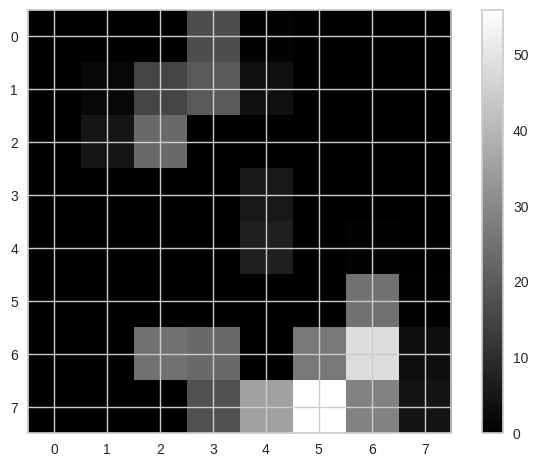

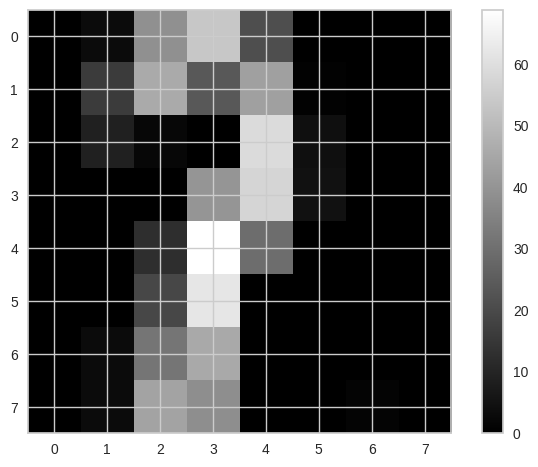

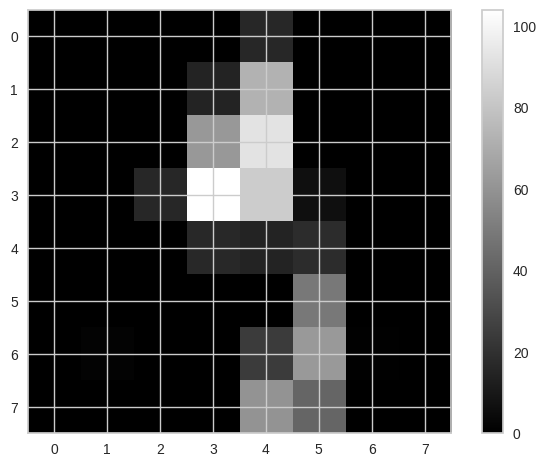

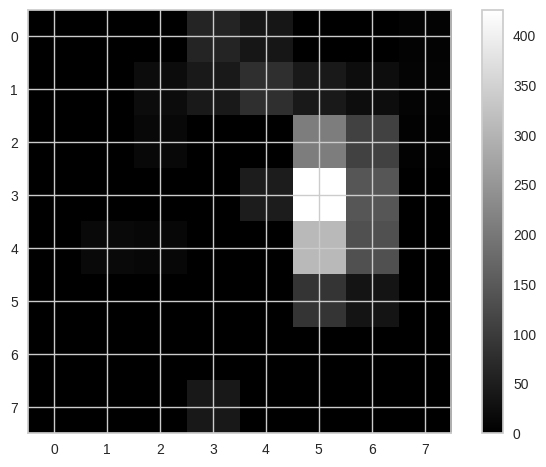

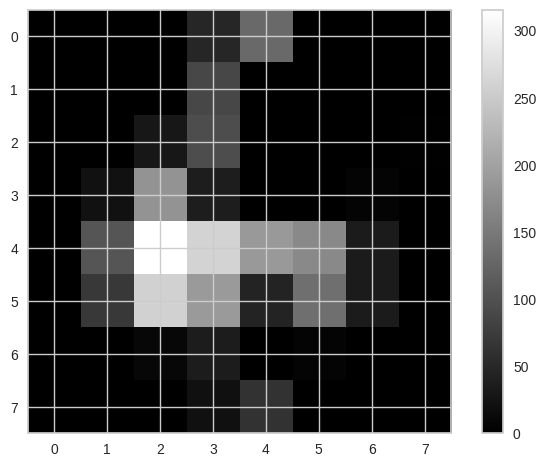

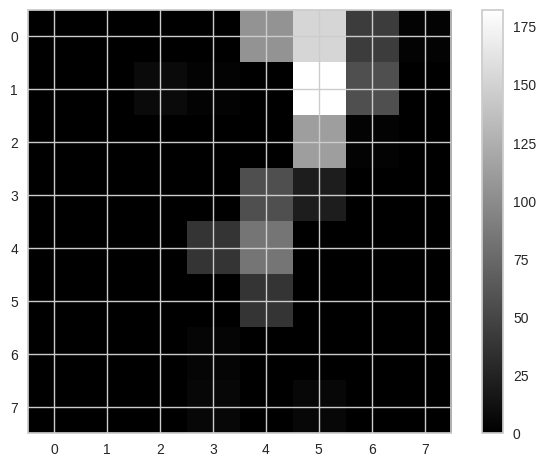

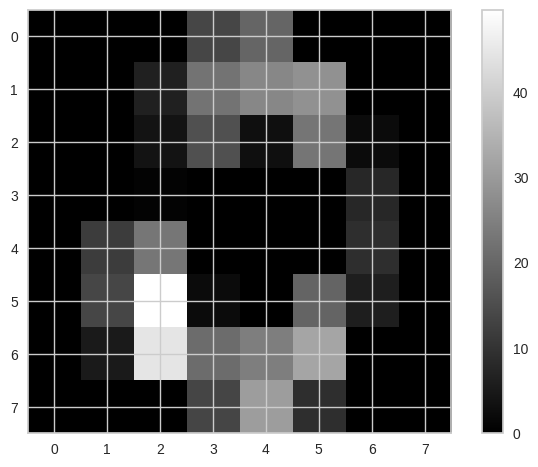

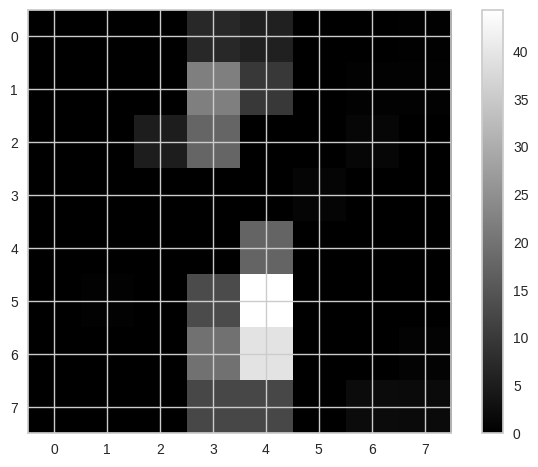

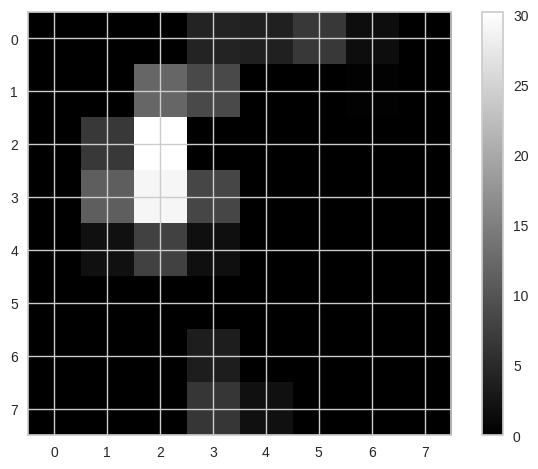

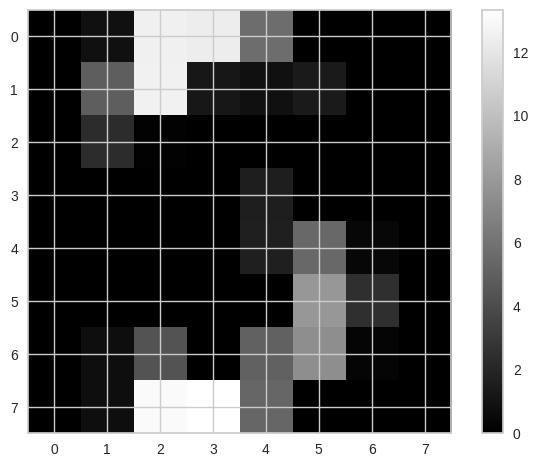

[0.         0.         0.         0.02484756 0.         0.00578204
 0.26909843 0.00870782 0.40011448 0.43667521]


In [ ]:
for component in nmf.components_:
    img = component.reshape(8, 8)

    plt.figure()
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

print(nmf_features[0])

Change the number of components and you can observe how NMF extracts key features that determine how a digit is written.

To see this extraction more clearly, let's compare this to a PCA, which does not extract such parts.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca_features = pca.fit_transform(digits.data)

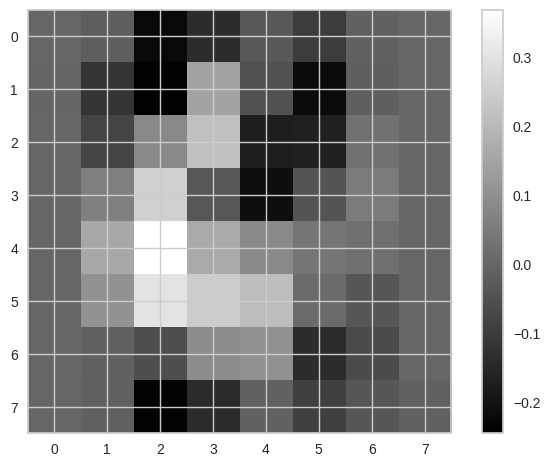

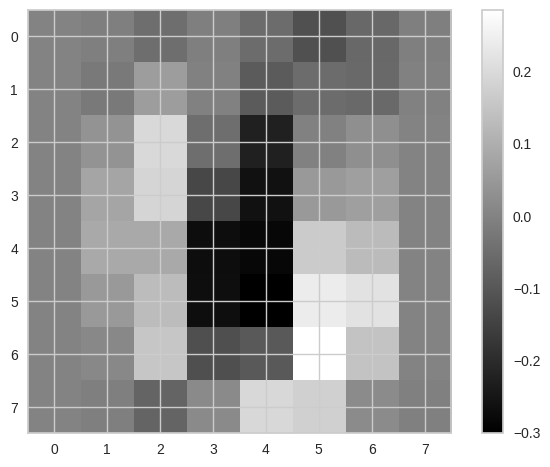

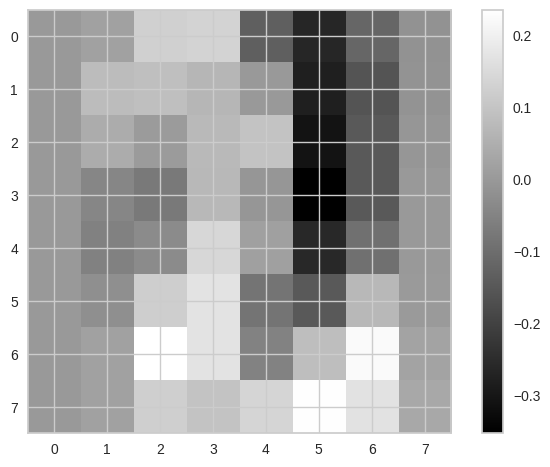

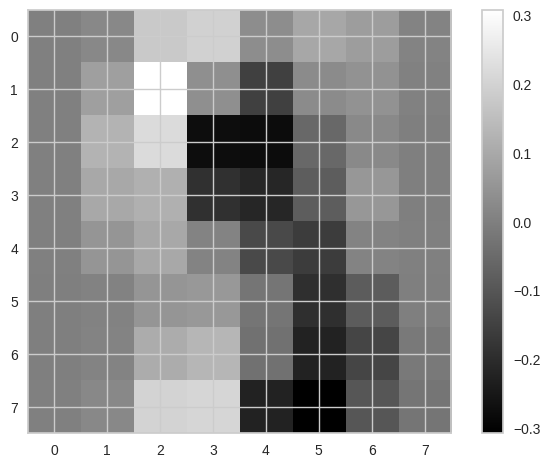

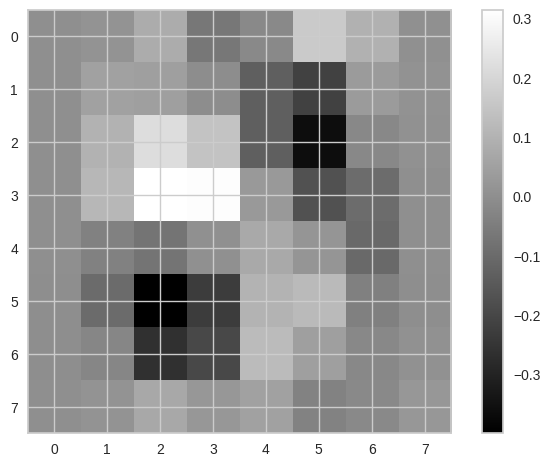

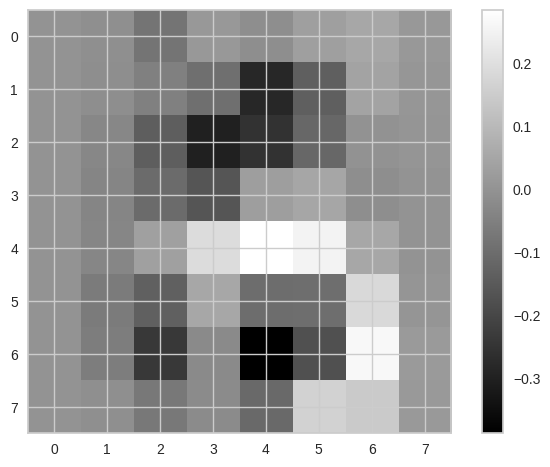

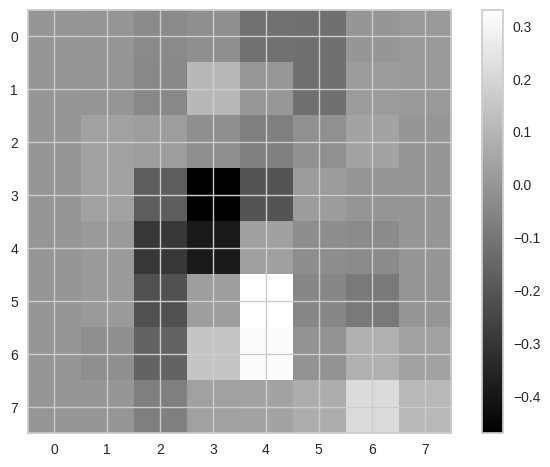

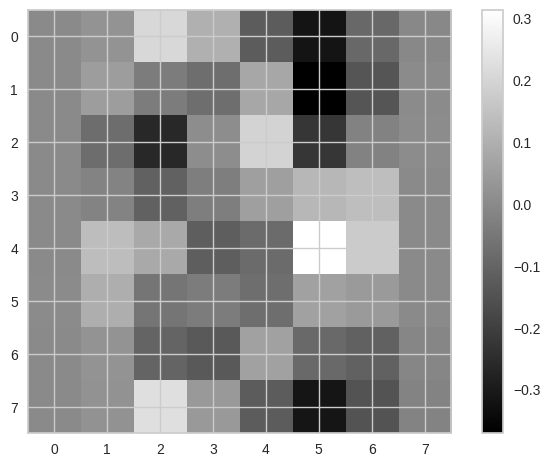

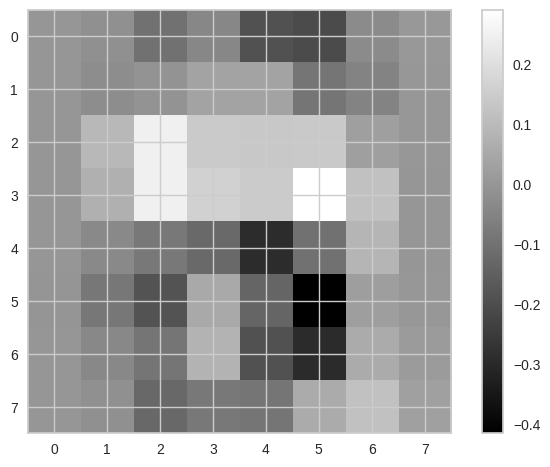

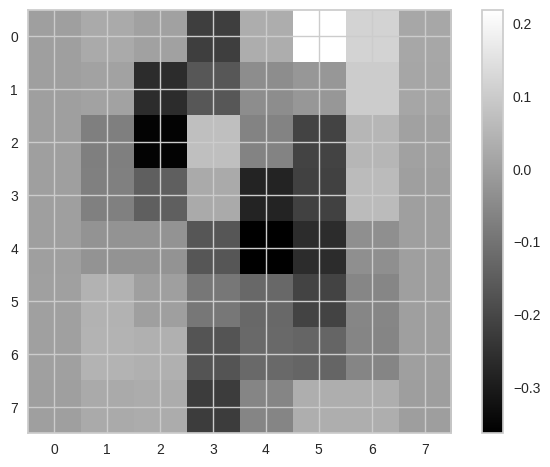

[-1.25943336 21.27498478 -9.46307629 13.01417682 -7.13030361 -7.43693784
  3.25908688  2.54971981 -0.58369602  3.62636878]


In [ ]:
for component in pca.components_:
    img = component.reshape(8, 8)

    plt.figure()
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

print(pca_features[0])

### How is the accuracy?
This is the result of the 8 x 8 digits (sample size 1797)

In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requi

In [ ]:
digits_nmf = pd.DataFrame(nmf_features)
digits_nmf['target'] = digits.target
digits_nmf

,0,1,2,3,4,5,6,7,8,9,target
0,0.000000,0.000000,0.000000,0.024848,0.000000,0.005782,0.269098,0.008708,0.400114,0.436675,0
1,0.019435,0.079468,0.120902,0.000000,0.011916,0.039844,0.000000,0.356121,0.143910,0.000000,1
2,0.126658,0.064109,0.045376,0.005823,0.012661,0.064972,0.166159,0.179175,0.000000,0.000000,2
3,0.106085,0.012114,0.126049,0.004058,0.003781,0.014181,0.000000,0.031365,0.000000,0.732662,3
4,0.000000,0.000000,0.082627,0.018653,0.039982,0.000000,0.058851,0.181484,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
1792,0.098373,0.000000,0.098466,0.038531,0.000000,0.045338,0.058209,0.004400,0.381602,0.434411,9
1793,0.017060,0.000000,0.000000,0.026600,0.005107,0.016411,0.325119,0.139667,0.468585,0.467963,0
1794,0.035932,0.091014,0.074844,0.010083,0.017301,0.018020,0.155017,0.268374,0.232549,0.000000,8
1795,0.104758,0.000000,0.082535,0.037831,0.009421,0.030762,0.057509,0.049934,0.397929,0.339237,9


In [ ]:
from pycaret.classification import *

In [ ]:
digits_experiment = setup(
    data=digits_nmf,
    target='target',
    train_size=0.9,
    preprocess=False,
)

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9623,0.9984,0.9623,0.9635,0.9620,0.9581,0.9583,0.2620
catboost,CatBoost Classifier,0.9586,0.9986,0.9586,0.9602,0.9586,0.9540,0.9541,14.0970
rf,Random Forest Classifier,0.9456,0.9975,0.9456,0.9474,0.9451,0.9395,0.9398,0.4190
lightgbm,Light Gradient Boosting Machine,0.9443,0.9971,0.9443,0.9460,0.9440,0.9381,0.9384,1.1640
qda,Quadratic Discriminant Analysis,0.9413,0.9962,0.9413,0.9448,0.9414,0.9347,0.9351,0.0270
xgboost,Extreme Gradient Boosting,0.9351,0.9962,0.9351,0.9373,0.9348,0.9278,0.9281,0.6370
gbc,Gradient Boosting Classifier,0.9215,0.9954,0.9215,0.9260,0.9221,0.9127,0.9131,3.3150
lda,Linear Discriminant Analysis,0.8788,0.9906,0.8788,0.8858,0.8787,0.8653,0.8662,0.0230
nb,Naive Bayes,0.8702,0.9875,0.8702,0.8785,0.8707,0.8557,0.8566,0.0220
knn,K Neighbors Classifier,0.8590,0.9744,0.8590,0.8596,0.8558,0.8433,0.8440,0.0290


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4447, verbose=0, warm_start=False)

For comparison purposes, the following is the same dataset that I am using to demonstrate deep learning in USML notebook 4 and 5.

In [ ]:
from torch.utils.data import random_split
from torchvision import datasets, transforms

dataset = datasets.MNIST('data', download=True, train=True)

In [ ]:
# Check the shape of the data
dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
# Flatten the data
dataset.data.view(60000, 28 * 28)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=20)  # This dataset has more features, so i use double the components.

nmf_features = nmf.fit_transform(dataset.data.view(60000, 28 * 28).numpy())

In [ ]:
nmf_features

array([[0.27239133, 0.07890673, 0.04371297, ..., 0.06607189, 0.03928464,
        0.        ],
       [0.07045022, 0.06409547, 0.        , ..., 0.06981593, 0.11530424,
        0.02282684],
       [0.        , 0.        , 0.0710583 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05067087, 0.        , 0.        , ..., 0.        , 0.20163038,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00403046, 0.        ,
        0.        ],
       [0.        , 0.00754081, 0.        , ..., 0.        , 0.        ,
        0.03941286]])

In [ ]:
digits_full_nmf = pd.DataFrame(nmf_features)
digits_full_nmf['target'] = dataset.targets
digits_full_nmf

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,target
0,0.272391,0.078907,0.043713,0.000000,0.126871,0.045600,0.000000,0.043850,0.015726,0.036919,...,0.041075,0.002325,0.000016,0.011231,0.000000,0.073649,0.066072,0.039285,0.000000,5
1,0.070450,0.064095,0.000000,0.200267,0.143140,0.000000,0.000000,0.043043,0.000000,0.000000,...,0.000000,0.003182,0.063050,0.021126,0.000000,0.046525,0.069816,0.115304,0.022827,0
2,0.000000,0.000000,0.071058,0.040780,0.013062,0.008759,0.083605,0.082355,0.000000,0.028586,...,0.018747,0.019927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.238460,0.000000,0.000000,0.106312,0.000000,0.000000,0.000000,0.014565,0.000000,...,0.021868,0.000000,0.000000,0.000000,0.022382,0.000000,0.000000,0.000163,0.415193,1
4,0.701752,0.000000,0.000000,0.046458,0.000000,0.022107,0.103294,0.000000,0.049477,0.000000,...,0.028668,0.000000,0.054212,0.002281,0.000000,0.048118,0.000000,0.000000,0.654436,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.253426,0.000000,0.000000,0.004687,0.108785,0.000000,0.022706,0.000000,0.006922,0.017930,...,0.086657,0.015778,0.005327,0.000606,0.019001,0.026666,0.012939,0.217861,0.159825,8
59996,0.000000,0.000000,0.000000,0.000000,0.161817,0.000000,0.000000,0.000000,0.000000,0.042572,...,0.117131,0.018470,0.000000,0.000000,0.000000,0.006225,0.094330,0.250700,0.266585,3
59997,0.050671,0.000000,0.000000,0.000000,0.083519,0.004101,0.000000,0.000000,0.004751,0.077814,...,0.063348,0.000036,0.049450,0.023791,0.000000,0.033415,0.000000,0.201630,0.000000,5
59998,0.000000,0.000000,0.000000,0.081197,0.026570,0.000000,0.029288,0.065760,0.039931,0.000000,...,0.000000,0.000000,0.031839,0.028174,0.000000,0.010150,0.004030,0.000000,0.000000,6


In [ ]:
from pycaret.classification import *

digits_full_experiment = setup(
    data=digits_full_nmf,
    target='target',
    train_size=0.9,
    preprocess=False,
    use_gpu=True
)

,Description,Value
0,Session id,8130
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(60000, 21)"
4,Transformed data shape,"(60000, 21)"
5,Transformed train set shape,"(54000, 21)"
6,Transformed test set shape,"(6000, 21)"
7,Numeric features,20


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:54:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

KeyboardInterrupt: ignored